# Regressão com Pytorch


O objetivo desse notebook é exemplificar a utilização do PyTorch como Framework de Machine Learning em resolver um problema simples de regressão linear e não linear.

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Regressão Linear

In [7]:
x.shape, y.shape

((100, 1), (100, 100))

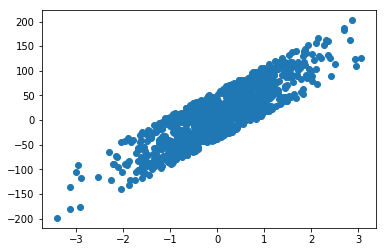

In [127]:
# Dados Sintéticos
x = np.random.randn(1000)
c = np.random.uniform(-40, 60, (1000))
y = 50*x + c

plt.scatter(x, y)

### Dataframe

In [128]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-0.149320,-39.085765
1,1.352995,34.492650
2,0.112611,59.496426
3,0.145448,-7.329018
4,0.182521,46.563734


In [129]:
train_x, test_x, train_y, test_y = train_test_split(df.x, df.y, test_size=.3)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((700,), (700,), (300,), (300,))

In [130]:
train_x.sample(10)

607    0.237557
78     0.464663
477    0.946593
727   -1.583684
311    1.018023
450    1.060415
568    1.388689
877    0.920136
785    0.007458
370    0.901816
Name: x, dtype: float64

### Modelo

In [131]:
device = torch.device('cpu')

class Linear(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

In [132]:
model = Linear(1).to(device)
model

Linear(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [133]:
train_y.iloc[[55, 10, 16,  9, 60, 64, 57, 59, 25, 43]]

236    -42.426395
132     49.923329
872     56.821425
753    -29.917687
54     -11.448021
759    -60.119721
609    -29.423326
661    -68.552056
739    -50.409969
356    107.162598
Name: y, dtype: float64

### Train

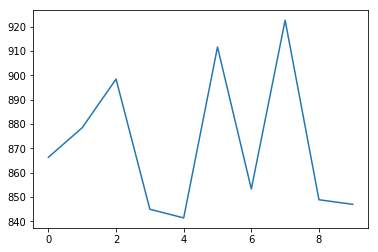

In [161]:
##### epochs = 10
batch  = 10
lr     = 1e-5

# loss
loss_fn   = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
history_loss    = []
for t in range(epochs):
    sum_loss    = 0
    steps_batch = int(len(train_x)/batch)

    for b in range(steps_batch):
        idx = np.random.randint(0, len(train_x)-1, batch)

        # switch model to training mode, clear gradient accumulators
        model.train(); 
    
        x   = torch.tensor(train_x.iloc[idx].values, dtype=torch.float32).reshape(batch,1)
        y   = torch.tensor(train_y.iloc[idx].values, dtype=torch.float32).reshape(batch,1)
        

        
        y_pred  = model(x)

        # Compute and print loss.
        loss = loss_fn(y, y_pred)
        sum_loss = sum_loss + loss.item()
        #print(t, loss.item())        

        # backpropagate and update optimizer learning rate
        loss.backward(); optimizer.step(); optimizer.zero_grad() 
    history_loss.append(sum_loss/steps_batch)
        
plt.plot(history_loss)

In [170]:
model = model.eval()
model(torch.tensor([-3,-1,0,1,3], dtype=torch.float32).reshape(5,1))

tensor([[-141.6189],
        [ -40.4538],
        [  10.1288],
        [  60.7114],
        [ 161.8765]], grad_fn=<AddmmBackward>)